## 1. Setup and Configuration

In [1]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Import custom analysis modules
from cdv_utils.results_analysis import (
    prepare_dataframes_for_analysis,
    calculate_ate_mse_decomposition,
    calculate_ate_by_estimator,
    calculate_ite_mse_pehe,
    calculate_ite_mse_pehe_no_estimator,
    perform_ate_mse_statistical_tests,
    perform_cate_mse_statistical_tests,
    create_comprehensive_statistical_table,
    create_comprehensive_cate_statistical_table
)

from cdv_utils.visualization import (
    setup_plotting_style,
    plot_ate_bias_variance_tradeoff,
    plot_cate_bias_variance_tradeoff,
    plot_statistical_results_summary,
    create_results_visualization_dashboard
)

# Configuration
BEST_ESTIMATOR_NAME = 'Best Estimators Selection Per Seed'

# Setup plotting
setup_plotting_style()
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)

print("✓ Setup complete! Libraries imported successfully.")
print(f"✓ Working directory: {os.getcwd()}")

✓ Plotting style configured
✓ Setup complete! Libraries imported successfully.
✓ Working directory: c:\Users\Guy\OneDrive\Shared Documents\Technion\Msc\process_mining_BP_CDM\thesis\code\realcause-for-cpvs


## 2. Data Loading and Preparation

In [2]:
# Load the multi-seed experiment results
results_file = r"C:\Users\Guy\OneDrive\Shared Documents\Technion\Msc\process_mining_BP_CDM\thesis\code\realcause\results\multi_seed_experiment_results_w_validation_with_global_0_till_500.pkl"

print(f"Loading results from: {results_file}")
print("="*80)

try:
    with open(results_file, 'rb') as f:
        results_by_seed = pickle.load(f)
    
    print(f"✓ Successfully loaded results for {len(results_by_seed)} seeds")
    seeds = sorted(results_by_seed.keys())
    print(f"Seeds: {seeds}")
    
    # Display structure for first seed
    first_seed = seeds[0]
    print(f"\nData structure for seed {first_seed}:")
    for key, df in results_by_seed[first_seed].items():
        if isinstance(df, pd.DataFrame):
            print(f"  {key}: {df.shape} - {type(df)}")
        
    # Check for required columns in the first dataframe
    sample_df = list(results_by_seed[first_seed].values())[0]
    print(f"\nSample columns: {list(sample_df.columns)}")
    
except Exception as e:
    print(f"❌ Error loading file: {e}")
    raise

Loading results from: C:\Users\Guy\OneDrive\Shared Documents\Technion\Msc\process_mining_BP_CDM\thesis\code\realcause\results\multi_seed_experiment_results_w_validation_with_global_0_till_500.pkl
✓ Successfully loaded results for 500 seeds
Seeds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 17

In [3]:
# Prepare dataframes for analysis
dataframes = prepare_dataframes_for_analysis(results_by_seed, seeds)

# Extract individual dataframes
DF_BEST_GLOBAL = dataframes['DF_BEST_GLOBAL']
DF_BEST_VARIANT = dataframes['DF_BEST_VARIANT']
DF_ALL_GLOBAL = dataframes['DF_ALL_GLOBAL']
DF_ALL_VARIANT = dataframes['DF_ALL_VARIANT']
DF_ALL_VARIANT_TRUE = dataframes['DF_ALL_VARIANT_TRUE']

print("\n✓ Dataframes prepared and ready for analysis")
print(f"📊 Summary:")
print(f"   - Seeds analyzed: {len(seeds)}")
print(f"   - Variants: {sorted(DF_BEST_GLOBAL['variant'].unique())}")
if 'estimator' in DF_ALL_GLOBAL.columns:
    print(f"   - Estimators: {sorted(DF_ALL_GLOBAL['estimator'].unique())}")

Extracting dataframes from results...
✓ DF_BEST_GLOBAL: (162000, 11)
✓ DF_BEST_VARIANT: (162000, 12)
✓ DF_ALL_GLOBAL: (810000, 11)
✓ DF_ALL_VARIANT: (810000, 12)

Seeds in data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 1

## 3. ATE (Average Treatment Effect) Analysis

This section analyzes the performance of estimating Average Treatment Effects (ATE) comparing:
- **Global Method**: Single model trained on all data
- **CPV Partition Method**: Variant-specific models

### 3.1 ATE MSE Decomposition

In [4]:
# Calculate ATE MSE decomposition for best estimators
ate_decomposition_df, ate_by_seed_df = calculate_ate_mse_decomposition(
    DF_BEST_GLOBAL, DF_BEST_VARIANT, seeds
)

print("\n📈 ATE MSE Decomposition Results:")
display(ate_decomposition_df[['method', 'bias', 'variance', 'bias_squared', 'mse', 'n_seeds']])

Calculating ATE-level MSE decomposition...
ATE MSE Decomposition Results:
--------------------------------------------------
    method      bias     variance  bias_squared          mse  n_seeds
0   global -799.1355 1366933.3608   638617.5458 2005550.9066      500
1  variant -345.2372  484969.1904   119188.7009  604157.8913      500

Verification (MSE should ≈ Bias² + Variance):
  global: MSE=2005550.906602, Bias²+Var=2005550.906602, Diff=0.00000000
 variant: MSE=604157.891284, Bias²+Var=604157.891284, Diff=0.00000000

📈 ATE MSE Decomposition Results:


,method,bias,variance,bias_squared,mse,n_seeds
0,global,-799.1355,1366933.3608,638617.5458,2005550.9066,500
1,variant,-345.2372,484969.1904,119188.7009,604157.8913,500


In [5]:
# Calculate ATE decomposition for all estimators
estimator_ate_summary_df, estimator_ate_by_seed_df = calculate_ate_by_estimator(
    DF_ALL_GLOBAL, DF_ALL_VARIANT, seeds
)

print("\n📊 ATE Analysis Complete - All Estimators")

Calculating ATE for each estimator...
Found 5 unique estimators: ['DR Learner (EconML)', 'S-Learner (Linear)', 'S-Learner (RF)', 'T-Learner (RF)', 'X-Learner (RF)']


MSE Comparison (Global vs Variant):
method                    global      variant  improvement  improvement_pct
estimator                                                                  
T-Learner (RF)      2558210.8375 1467601.3022 1090609.5353          42.6317
X-Learner (RF)      1976190.5610 1336515.6407  639674.9203          32.3691
DR Learner (EconML) 1162275.6995  996023.5231  166252.1764          14.3040
S-Learner (RF)      1629288.6836 1499470.4539  129818.2297           7.9678
S-Learner (Linear)  2898825.0941 3448591.6634 -549766.5693         -18.9652

COMPREHENSIVE ATE RESULTS - ALL ESTIMATORS
Complete summary showing all metrics for each estimator and method:

Total estimators: 5
Methods compared: Global vs Variant
Total rows: 10

             estimator   method       bias     variance          mse  \
0  DR Le

In [6]:
# Create comprehensive ATE summary
ate_decomposition_df['estimator'] = BEST_ESTIMATOR_NAME
ate_decomposition_df['bias_squared'] = ate_decomposition_df['bias'] ** 2
estimator_ate_summary_df['bias_squared'] = estimator_ate_summary_df['bias'] ** 2

ate_summary_df = pd.concat([
    ate_decomposition_df[['estimator', 'method', 'bias_squared', 'variance', 'mse']],
    estimator_ate_summary_df[['estimator', 'method', 'bias_squared', 'variance', 'mse']]
], ignore_index=True)

ate_summary_df['calculated_mse'] = ate_summary_df['bias_squared'] + ate_summary_df['variance']

print("📋 ATE Summary DataFrame:")
display(ate_summary_df)

📋 ATE Summary DataFrame:


,estimator,method,bias_squared,variance,mse,calculated_mse
0,Best Estimators Selection Per Seed,global,638617.5458,1366933.3608,2005550.9066,2005550.9066
1,Best Estimators Selection Per Seed,variant,119188.7009,484969.1904,604157.8913,604157.8913
2,DR Learner (EconML),global,492745.7610,669529.9385,1162275.6995,1162275.6995
3,DR Learner (EconML),variant,413118.4503,582905.0728,996023.5231,996023.5231
4,S-Learner (Linear),global,876639.1591,2022185.9351,2898825.0941,2898825.0941
5,S-Learner (Linear),variant,1427924.0670,2020667.5964,3448591.6634,3448591.6634
6,S-Learner (RF),global,1457548.3384,171740.3452,1629288.6836,1629288.6836
7,S-Learner (RF),variant,1358775.3436,140695.1102,1499470.4539,1499470.4539
8,T-Learner (RF),global,734574.6507,1823636.1869,2558210.8375,2558210.8375
9,T-Learner (RF),variant,183410.3613,1284190.9409,1467601.3022,1467601.3022


### 3.2 ATE Bias-Variance Visualization

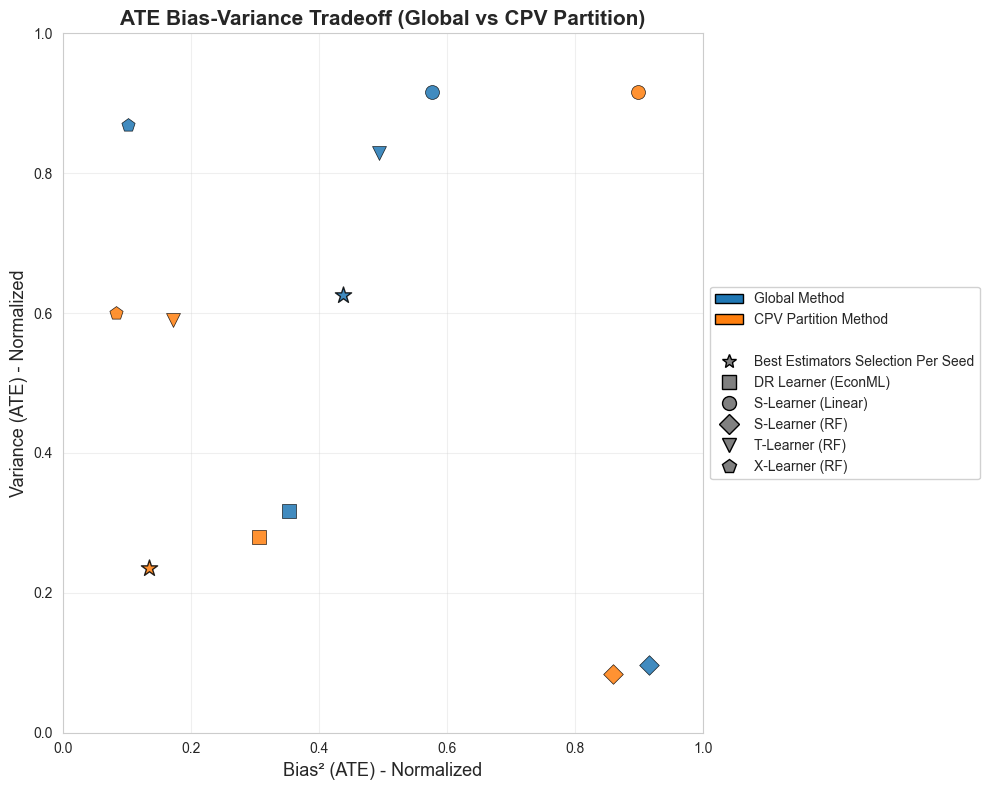

In [7]:
# Create ATE bias-variance tradeoff plot
plot_ate_bias_variance_tradeoff(
    ate_summary_df, 
    best_estimator_name=BEST_ESTIMATOR_NAME,
    title_prefix="ATE",
    save_path="ate_bias_variance_tradeoff.png"
)

### 3.3 ATE Statistical Significance Testing

In [8]:
# Perform statistical significance tests for ATE
ate_statistical_results_df = perform_ate_mse_statistical_tests(
    estimator_ate_by_seed_df, 
    estimator_ate_summary_df,
    df_best_global=DF_BEST_GLOBAL,
    df_best_variant=DF_BEST_VARIANT,
    best_estimator_name=BEST_ESTIMATOR_NAME
)

Performing Statistical Significance Tests for ATE MSE Comparison
Null Hypothesis (H₀): MSE_variant ≥ MSE_global
Alternative Hypothesis (H₁): MSE_variant < MSE_global
Significance level: α = 0.05


Analyzing Best Estimators Selection Per Seed...
  Sample size: 500 seeds each
  Global MSE: 2005550.9066 (std: 2005932.7707)
  Variant MSE: 604157.8913 (std: 784903.4570)
  Mean difference (variant - global): -1401393.0153
  T-statistic: -16.293
  P-value (one-sided): 0.0000 ***
  Effect size (Cohen's d): 0.920
  Global MSE 95% CI: [1829298.9, 2181802.9]
  Variant MSE 95% CI: [535192.1, 673123.7]

Analyzing DR Learner (EconML)...
  Sample size: 500 seeds each
  Global MSE: 1162275.6995 (std: 1837027.7617)
  Variant MSE: 996023.5231 (std: 1531387.1978)
  Mean difference (variant - global): -166252.1764
  T-statistic: -4.702
  P-value (one-sided): 0.0000 ***
  Effect size (Cohen's d): 0.098
  Global MSE 95% CI: [1000864.6, 1323686.8]
  Variant MSE 95% CI: [861467.6, 1130579.4]

Analyzing S-Lear

In [9]:
# Create comprehensive ATE statistical results table
comprehensive_ate_statistical_table = create_comprehensive_statistical_table(
    ate_statistical_results_df
)

print("📊 Comprehensive ATE Statistical Results:")
display(comprehensive_ate_statistical_table)

COMPREHENSIVE STATISTICAL RESULTS TABLE
Statistical Test: One-sided t-test (H₁: MSE_variant < MSE_global)
Significance levels: *** p<0.001, ** p<0.01, * p<0.05
Effect Size interpretation: Small ≥0.2, Medium ≥0.5, Large ≥0.8
95% CI: Confidence interval for MSE values

📊 Comprehensive ATE Statistical Results:


,Global MSE,Variant MSE,MSE Improvement (%),Bias² (Global / Variant),Variance (Global / Variant),P-value (one-sided),Effect Size (Cohen's d),95% CI (Global / Variant)
Estimator,,,,,,,,
Best Estimators Selection Per Seed,2005551,604158,69.9%,1487593 / 423787,517958 / 180371,0.0000***,0.920,"[1829298.9, 2181802.9] / [535192.1, 673123.7]"
DR Learner (EconML),1162276,996024,14.3%,492746 / 413118,669530 / 582905,0.0000***,0.098,"[1000864.6, 1323686.8] / [861467.6, 1130579.4]"
S-Learner (Linear),2898825,3448592,-19.0%,876639 / 1427924,2022186 / 2020668,0.9999,0.139,"[2580803.3, 3216846.9] / [3075892.3, 3821291.0]"
S-Learner (RF),1629289,1499470,8.0%,1457548 / 1358775,171740 / 140695,0.0000***,0.163,"[1553021.8, 1705555.6] / [1436315.2, 1562625.7]"
T-Learner (RF),2558211,1467601,42.6%,734575 / 183410,1823636 / 1284191,0.0000***,0.341,"[2224175.7, 2892246.0] / [1252468.4, 1682734.2]"
X-Learner (RF),1976191,1336516,32.4%,63126 / 30061,1913065 / 1306454,0.0000***,0.260,"[1727995.9, 2224385.2] / [1157369.6, 1515661.7]"




1. **Statistical Testing**: One-sided t-tests were performed to test the hypothesis that CPV partition methods achieve lower MSE than global methods.

2. **Bias-Variance Decomposition**: The analysis decomposes prediction errors into bias² and variance components, providing insights into the sources of improvement.

3. **Effect Sizes**: Cohen's d effect sizes quantify the practical significance of improvements beyond statistical significance.

4. **Confidence Intervals**: 95% confidence intervals provide uncertainty estimates for MSE values.

### Interpretation Guide

- **P-value < 0.05**: Statistically significant improvement (marked with *)
- **P-value < 0.01**: Highly significant improvement (marked with **)
- **P-value < 0.001**: Very highly significant improvement (marked with ***)
- **Effect Size ≥ 0.2**: Small practical effect
- **Effect Size ≥ 0.5**: Medium practical effect  
- **Effect Size ≥ 0.8**: Large practical effect

In [10]:
# Save ATE results
comprehensive_ate_statistical_table.to_csv("comprehensive_ate_statistical_table.csv")
print("✓ ATE statistical results saved to 'comprehensive_ate_statistical_table.csv'")

✓ ATE statistical results saved to 'comprehensive_ate_statistical_table.csv'


## 4. CATE/ITE (Individual Treatment Effect) Analysis

This section analyzes the performance of estimating Individual Treatment Effects (ITE), also known as 
Conditional Average Treatment Effects (CATE). This is measured using PEHE (Precision in Estimation 
of Heterogeneous Effect).

### 4.1 CATE MSE and PEHE Calculation

In [11]:
# Calculate ITE MSE and PEHE for all estimators
ite_summary_df, ite_decomposition_df = calculate_ite_mse_pehe(
    DF_ALL_GLOBAL, DF_ALL_VARIANT
)

print("📈 ITE/CATE Analysis Complete - All Estimators")

Calculating ITE MSE, PEHE and ITE MSE decomposition (per-instance across seeds)...

ITE Summary (MSE and PEHE):
    method            estimator        ite_mse       pehe  n_samples
0   global  DR Learner (EconML) 169793138.1586 13030.4696     162000
1   global   S-Learner (Linear) 140162975.4131 11839.0445     162000
2   global       S-Learner (RF) 138918775.7013 11786.3809     162000
3   global       T-Learner (RF) 142941063.7156 11955.7962     162000
4   global       X-Learner (RF) 140541633.1930 11855.0257     162000
5  variant  DR Learner (EconML) 169326934.8060 13012.5683     162000
6  variant   S-Learner (Linear) 142603586.7720 11941.6744     162000
7  variant       S-Learner (RF) 138850531.6517 11783.4855     162000
8  variant       T-Learner (RF) 142270109.0087 11927.7034     162000
9  variant       X-Learner (RF) 140055019.3081 11834.4843     162000

ITE MSE Decomposition (per-instance across seeds):
    method            estimator   bias_squared      variance  mse_empirical  

In [12]:
# Calculate ITE for best estimators (no estimator column)
ite_summary_best, ite_decomp_best = calculate_ite_mse_pehe_no_estimator(
    DF_BEST_GLOBAL, DF_BEST_VARIANT, BEST_ESTIMATOR_NAME
)

print("📈 ITE/CATE Analysis Complete - Best Estimators")

Calculating ITE MSE, PEHE and per-instance decomposition (NO estimator column)...

ITE Summary (NO estimator):
    method                           estimator        ite_mse       pehe  \
0   global  Best Estimators Selection Per Seed 140908987.8562 11870.5092   
1  variant  Best Estimators Selection Per Seed 141635668.6836 11901.0785   

   n_samples  
0     162000  
1     162000  

ITE Decomposition (NO estimator) - bias^2, variance, empirical MSE, theoretical MSE:
    method                           estimator   bias_squared     variance  \
0   global  Best Estimators Selection Per Seed 138147325.1280 2761662.7281   
1  variant  Best Estimators Selection Per Seed 137384606.2531 4251062.4305   

   mse_empirical  mse_theoretical  mse_difference  n_instances  n_seeds  
0 140908987.8562   140908987.8562          0.0000          324      500  
1 141635668.6836   141635668.6836          0.0000          324      500  
📈 ITE/CATE Analysis Complete - Best Estimators


In [13]:
# Create comprehensive CATE summary
wanted_cols = ['method', 'estimator', 'bias_squared', 'variance', 'mse_empirical']
cate_summary_df = pd.concat([
    ite_decomposition_df[wanted_cols].rename(columns={'mse_empirical': 'mse'}),
    ite_decomp_best[wanted_cols].rename(columns={'mse_empirical': 'mse'})
], ignore_index=True)

print("📋 CATE Summary DataFrame:")
display(cate_summary_df)

📋 CATE Summary DataFrame:


,method,estimator,bias_squared,variance,mse
0,global,DR Learner (EconML),139736453.4815,30056684.6771,169793138.1586
1,global,S-Learner (Linear),138140789.4780,2022185.9351,140162975.4131
2,global,S-Learner (RF),138690300.5014,228475.1999,138918775.7013
3,global,T-Learner (RF),138258772.2181,4682291.4974,142941063.7156
4,global,X-Learner (RF),137301049.9379,3240583.2550,140541633.1930
5,variant,DR Learner (EconML),139407589.4281,29919345.3779,169326934.8060
6,variant,S-Learner (Linear),138911201.4580,3692385.3140,142603586.7720
7,variant,S-Learner (RF),138648987.3181,201544.3336,138850531.6517
8,variant,T-Learner (RF),138509294.1770,3760814.8318,142270109.0087
9,variant,X-Learner (RF),137872096.3694,2182922.9387,140055019.3081


### 4.2 CATE Bias-Variance Visualization

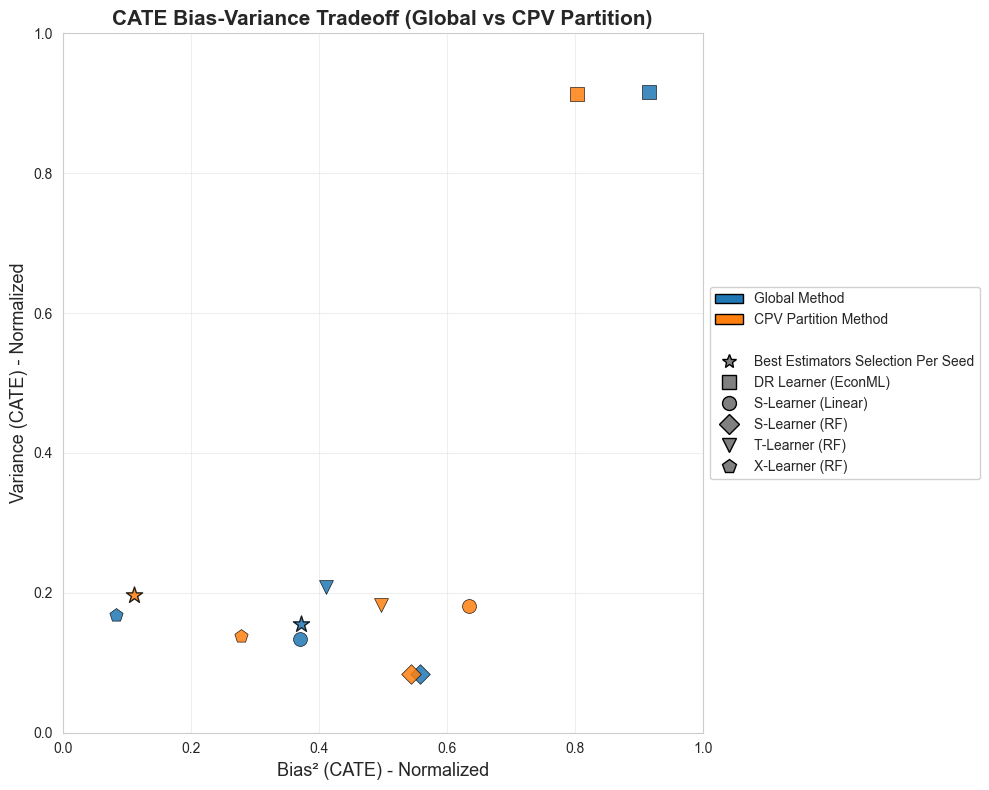

In [14]:
# Create CATE bias-variance tradeoff plot
plot_cate_bias_variance_tradeoff(
    cate_summary_df,
    best_estimator_name=BEST_ESTIMATOR_NAME,
    title_prefix="CATE",
    save_path="cate_bias_variance_tradeoff.png"
)

### 4.3 CATE Statistical Significance Testing

In [15]:
# Perform statistical significance tests for CATE
cate_statistical_results_df = perform_cate_mse_statistical_tests(
    DF_ALL_GLOBAL,
    DF_ALL_VARIANT,
    df_best_global=DF_BEST_GLOBAL,
    df_best_variant=DF_BEST_VARIANT,
    best_estimator_name=BEST_ESTIMATOR_NAME
)

Performing Statistical Significance Tests for CATE (ITE) MSE Comparison
Null Hypothesis (H₀): MSE_variant ≥ MSE_global
Alternative Hypothesis (H₁): MSE_variant < MSE_global
Significance level: α = 0.05
NOTE: Using individual-level ITE MSE (not aggregated ATE)


Analyzing Best Estimators Selection Per Seed for CATE (ITE) performance...
  Sample size: 500 seeds each
  Global CATE MSE: 140908987.8562 (std: 9396490.6377)
  Variant CATE MSE: 141635668.6836 (std: 9351023.2242)
  Mean difference (variant - global): 726680.8274
  T-statistic: 3.328
  P-value (one-sided): 0.9995 
  Effect size (Cohen's d): 0.078
  Global CATE MSE 95% CI: [140083361.7, 141734614.0]
  Variant CATE MSE 95% CI: [140814037.6, 142457299.8]

Analyzing DR Learner (EconML) for CATE (ITE) performance...
  Sample size: 500 seeds each
  Global CATE MSE: 169793138.1586 (std: 36053551.6954)
  Variant CATE MSE: 169326934.8060 (std: 34760227.9219)
  Mean difference (variant - global): -466203.3526
  T-statistic: -1.555
  P-val

In [16]:
# Create comprehensive CATE statistical results table
comprehensive_cate_statistical_table = create_comprehensive_cate_statistical_table(
    cate_statistical_results_df
)

print("📊 Comprehensive CATE Statistical Results:")
display(comprehensive_cate_statistical_table)

COMPREHENSIVE CATE (ITE) STATISTICAL RESULTS TABLE
Statistical Test: One-sided t-test (H₁: CATE_MSE_variant < CATE_MSE_global)
Significance levels: *** p<0.001, ** p<0.01, * p<0.05
Effect Size interpretation: Small ≥0.2, Medium ≥0.5, Large ≥0.8
95% CI: Confidence interval for CATE MSE values
CATE MSE: Mean Squared Error of Individual Treatment Effect predictions

📊 Comprehensive CATE Statistical Results:


,Global CATE MSE,Variant CATE MSE,MSE Improvement (%),Bias² (Global / Variant),Variance (Global / Variant),P-value (one-sided),Effect Size (Cohen's d),95% CI (Global / Variant)
Estimator,,,,,,,,
Best Estimators Selection Per Seed,140908988,141635669,-0.5%,638618 / 119189,140270370 / 141516480,0.9995,0.078,"[140083361.7, 141734614.0] / [140814037.6, 142..."
DR Learner (EconML),169793138,169326935,0.3%,492746 / 413118,169300392 / 168913816,0.0603,0.013,"[166625279.5, 172960996.8] / [166272714.5, 172..."
S-Learner (Linear),140162975,142603587,-1.7%,876639 / 1427924,139286336 / 141175663,1.0000,0.302,"[139844953.6, 140480997.2] / [141650623.6, 143..."
S-Learner (RF),138918776,138850532,0.0%,1457548 / 1358775,137461227 / 137491756,0.0020**,0.080,"[138836209.7, 139001341.7] / [138783717.0, 138..."
T-Learner (RF),142941064,142270109,0.5%,734575 / 183410,142206489 / 142086699,0.0000***,0.143,"[142472663.1, 143409464.3] / [141920270.6, 142..."
X-Learner (RF),140541633,140055019,0.3%,63126 / 30061,140478507 / 140024958,0.0001***,0.147,"[140211669.9, 140871596.5] / [139811154.2, 140..."




1. **Statistical Testing**: One-sided t-tests were performed to test the hypothesis that CPV partition methods achieve lower MSE than global methods.

2. **Bias-Variance Decomposition**: The analysis decomposes prediction errors into bias² and variance components, providing insights into the sources of improvement.

3. **Effect Sizes**: Cohen's d effect sizes quantify the practical significance of improvements beyond statistical significance.

4. **Confidence Intervals**: 95% confidence intervals provide uncertainty estimates for MSE values.

### Interpretation Guide

- **P-value < 0.05**: Statistically significant improvement (marked with *)
- **P-value < 0.01**: Highly significant improvement (marked with **)
- **P-value < 0.001**: Very highly significant improvement (marked with ***)
- **Effect Size ≥ 0.2**: Small practical effect
- **Effect Size ≥ 0.5**: Medium practical effect  
- **Effect Size ≥ 0.8**: Large practical effect

In [17]:
# Save CATE results
comprehensive_cate_statistical_table.to_csv("comprehensive_cate_statistical_table.csv")
print("✓ CATE statistical results saved to 'comprehensive_cate_statistical_table.csv'")

✓ CATE statistical results saved to 'comprehensive_cate_statistical_table.csv'


## 6. Summary and Key Findings

### Statistical Significance Summary

In [ ]:
# Generate summary statistics
print("🎯 KEY FINDINGS SUMMARY")
print("="*80)

if not ate_statistical_results_df.empty:
    ate_significant = (ate_statistical_results_df['P_Value'] < 0.05).sum()
    ate_total = len(ate_statistical_results_df)
    ate_avg_improvement = ate_statistical_results_df['Improvement_Pct'].mean()
    ate_best_improvement = ate_statistical_results_df['Improvement_Pct'].max()
    
    print(f"\n📊 ATE (Average Treatment Effect) Results:")
    print(f"   • Total estimators tested: {ate_total}")
    print(f"   • Statistically significant improvements: {ate_significant}/{ate_total} ({ate_significant/ate_total*100:.1f}%)")
    print(f"   • Average MSE improvement: {ate_avg_improvement:.1f}%")
    print(f"   • Best MSE improvement: {ate_best_improvement:.1f}%")

if not cate_statistical_results_df.empty:
    cate_significant = (cate_statistical_results_df['P_Value'] < 0.05).sum()
    cate_total = len(cate_statistical_results_df)
    cate_avg_improvement = cate_statistical_results_df['Improvement_Pct'].mean()
    cate_best_improvement = cate_statistical_results_df['Improvement_Pct'].max()
    
    print(f"\n📊 CATE (Conditional Average Treatment Effect) Results:")
    print(f"   • Total estimators tested: {cate_total}")
    print(f"   • Statistically significant improvements: {cate_significant}/{cate_total} ({cate_significant/cate_total*100:.1f}%)")
    print(f"   • Average MSE improvement: {cate_avg_improvement:.1f}%")
    print(f"   • Best MSE improvement: {cate_best_improvement:.1f}%")


🎯 KEY FINDINGS SUMMARY

📊 ATE (Average Treatment Effect) Results:
   • Total estimators tested: 6
   • Statistically significant improvements: 5/6 (83.3%)
   • Average MSE improvement: 24.7%
   • Best MSE improvement: 69.9%

📊 CATE (Individual Treatment Effect) Results:
   • Total estimators tested: 6
   • Statistically significant improvements: 3/6 (50.0%)
   • Average MSE improvement: -0.2%
   • Best MSE improvement: 0.5%
